In [81]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import glob

# Get CSV files list from a folder
path = "/Users/shakilrafi/Project_Small_Business_Schubert/"
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file, usecols=["InitialApprovalAmount","BorrowerZip"]) for file in csv_files)

# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)



In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11468681 entries, 0 to 11468680
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   BorrowerZip            object 
 1   InitialApprovalAmount  float64
dtypes: float64(1), object(1)
memory usage: 175.0+ MB


In [83]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11468681 entries, 0 to 11468680
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   BorrowerZip            object 
 1   InitialApprovalAmount  float64
dtypes: float64(1), object(1)
memory usage: 807.9 MB


In [84]:
df.head()

,BorrowerZip,InitialApprovalAmount
0,33707-1331,3900.0
1,33309,3900.0
2,34677,3900.0
3,33016-5814,3900.0
4,33907,3900.0


In [85]:
csv_files

['/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_4_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_9_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_1_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_6_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_11_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_3_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_5_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_12_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_8_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_150k_plus_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_150k_2_220403.csv',
 '/Users/shakilrafi/Project_Small_Business_Schubert/public_up_to_1

In [86]:
zip_codes = pd.read_csv("/Users/shakilrafi/Downloads/archive/kaggle_income.csv",engine='python',encoding='latin1',dtype = {"Zip_Code":str})

In [87]:
zip_codes.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [88]:
zip_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32526 entries, 0 to 32525
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32526 non-null  int64  
 1   State_Code  32526 non-null  int64  
 2   State_Name  32526 non-null  object 
 3   State_ab    32526 non-null  object 
 4   County      32526 non-null  object 
 5   City        32526 non-null  object 
 6   Place       32526 non-null  object 
 7   Type        32526 non-null  object 
 8   Primary     32526 non-null  object 
 9   Zip_Code    32526 non-null  object 
 10  Area_Code   32526 non-null  object 
 11  ALand       32526 non-null  int64  
 12  AWater      32526 non-null  int64  
 13  Lat         32526 non-null  float64
 14  Lon         32526 non-null  float64
 15  Mean        32526 non-null  int64  
 16  Median      32526 non-null  int64  
 17  Stdev       32526 non-null  int64  
 18  sum_w       32526 non-null  float64
dtypes: float64(3), int64(7), 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11468681 entries, 0 to 11468680
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   BorrowerZip            object 
 1   InitialApprovalAmount  float64
dtypes: float64(1), object(1)
memory usage: 175.0+ MB


In [90]:
df["BorrowerZip"] = df["BorrowerZip"].str.split('-', 1).str[0]

In [91]:
zip_codes = zip_codes.rename(columns={"Zip_Code":"BorrowerZip"})

In [92]:
df = df.groupby("BorrowerZip").mean("InitialApprovalAmount").reset_index()

In [93]:
df = pd.merge(df, zip_codes)

In [94]:
df

,BorrowerZip,InitialApprovalAmount,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,00601,14404.872430,72026,72,Puerto Rico,PR,Adjuntas Municipio,Adjuntas,Adjuntas,Track,Track,787,42529236,210360,18.155582,-66.701046,24000,15004,29483,1243.880991
1,00601,14404.872430,7202946,72,Puerto Rico,PR,Adjuntas Municipio,Adjuntas,Adjuntas,Track,Track,787,44833906,90659,18.204166,-66.737830,19807,9378,21654,524.345149
2,00601,14404.872430,7202956,72,Puerto Rico,PR,Adjuntas Municipio,Adjuntas,Adjuntas,Track,Track,787,42529236,210360,18.155582,-66.701046,23682,15051,30309,615.289902
3,00602,19397.552099,7201727,72,Puerto Rico,PR,Aguada Municipio,Aguada,Luyando,Community,place,787,4242241,0,18.357471,-67.155343,17939,12641,15438,721.622289
4,00602,19397.552099,720216,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32408,99901,76587.420484,201540,2,Alaska,AK,Ketchikan Gateway Borough,Ketchikan,Loring,CDP,place,907,1434002,200593,55.606676,-131.639976,0,0,0,0.000000
32409,99901,76587.420484,202107,2,Alaska,AK,Aleutians East Borough,Ketchikan,Akutan city,Track,Track,907,12523988591,4646176559,55.449938,-131.106685,97685,86630,64617,546.003168
32410,99901,76587.420484,202547,2,Alaska,AK,Aleutians East Borough,Ketchikan,Akutan city,Track,Track,907,13478407,1172057,55.371516,-131.669594,75033,64332,53249,355.017831
32411,99926,20123.684932,202657,2,Alaska,AK,Aleutians East Borough,Metlakatla,Akutan city,Track,Track,907,343946421,213611590,55.138352,-131.470424,69964,48663,58581,173.826619


In [95]:
df["InitialApprovalAmount"].describe()

count    3.241300e+04
mean     6.732874e+04
std      4.863695e+04
min      1.176000e+03
25%      4.045930e+04
50%      5.981756e+04
75%      8.486279e+04
max      1.795477e+06
Name: InitialApprovalAmount, dtype: float64

In [96]:
df["Median"].corr(df["InitialApprovalAmount"])

0.0695756567589576

In [97]:
population = pd.read_csv("/Users/shakilrafi/Downloads/archive-2/population_by_zip_2010.csv", dtype = {"zipcode":str})

In [98]:
population

,population,minimum_age,maximum_age,gender,zipcode,geo_id
0,50,30.0,34.0,female,61747,8600000US61747
1,5,85.0,NaN,male,64120,8600000US64120
2,1389,30.0,34.0,male,95117,8600000US95117
3,231,60.0,61.0,female,74074,8600000US74074
4,56,0.0,4.0,female,58042,8600000US58042
...,...,...,...,...,...,...
1622826,66,15.0,17.0,female,28640,8600000US28640
1622827,791,25.0,29.0,male,98604,8600000US98604
1622828,55,55.0,59.0,female,29545,8600000US29545
1622829,10,25.0,29.0,female,45319,8600000US45319


In [99]:
population_by_zip = population.groupby("zipcode").sum("population").reset_index()

In [100]:
population_by_zip = population_by_zip.rename(columns={"zipcode":"BorrowerZip"})

In [101]:
df = pd.merge(df,population_by_zip)

In [102]:
df["population"].corr(df["InitialApprovalAmount"])

0.035149277410501306

In [103]:
df.head()

,BorrowerZip,InitialApprovalAmount,id,State_Code,State_Name,State_ab,County,City,Place,Type,...,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,population,minimum_age,maximum_age
0,00602,19397.552099,7201727,72,Puerto Rico,PR,Aguada Municipio,Aguada,Luyando,Community,...,0,18.357471,-67.155343,17939,12641,15438,721.622289,124560,1910.0,1866.0
1,00602,19397.552099,720216,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,...,33597561,18.412041,-67.213413,0,0,0,0.000000,124560,1910.0,1866.0
2,00602,19397.552099,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,...,795887,18.385424,-67.203310,15520,9923,15541,238.813450,124560,1910.0,1866.0
3,00602,19397.552099,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,...,0,18.356565,-67.180686,41933,34054,31539,313.551070,124560,1910.0,1866.0
4,00602,19397.552099,7202986,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,...,33597561,18.412041,-67.213413,0,0,0,0.000000,124560,1910.0,1866.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31956 entries, 0 to 31955
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BorrowerZip            31956 non-null  object 
 1   InitialApprovalAmount  31956 non-null  float64
 2   id                     31956 non-null  int64  
 3   State_Code             31956 non-null  int64  
 4   State_Name             31956 non-null  object 
 5   State_ab               31956 non-null  object 
 6   County                 31956 non-null  object 
 7   City                   31956 non-null  object 
 8   Place                  31956 non-null  object 
 9   Type                   31956 non-null  object 
 10  Primary                31956 non-null  object 
 11  Area_Code              31956 non-null  object 
 12  ALand                  31956 non-null  int64  
 13  AWater                 31956 non-null  int64  
 14  Lat                    31956 non-null  float64
 15  Lo

In [105]:
df.columns

Index(['BorrowerZip', 'InitialApprovalAmount', 'id', 'State_Code',
       'State_Name', 'State_ab', 'County', 'City', 'Place', 'Type', 'Primary',
       'Area_Code', 'ALand', 'AWater', 'Lat', 'Lon', 'Mean', 'Median', 'Stdev',
       'sum_w', 'population', 'minimum_age', 'maximum_age'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31956 entries, 0 to 31955
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BorrowerZip            31956 non-null  object 
 1   InitialApprovalAmount  31956 non-null  float64
 2   id                     31956 non-null  int64  
 3   State_Code             31956 non-null  int64  
 4   State_Name             31956 non-null  object 
 5   State_ab               31956 non-null  object 
 6   County                 31956 non-null  object 
 7   City                   31956 non-null  object 
 8   Place                  31956 non-null  object 
 9   Type                   31956 non-null  object 
 10  Primary                31956 non-null  object 
 11  Area_Code              31956 non-null  object 
 12  ALand                  31956 non-null  int64  
 13  AWater                 31956 non-null  int64  
 14  Lat                    31956 non-null  float64
 15  Lo

In [107]:
df = df[df["Median"] != 0]
df = df[df["Median"] != 300000]

In [108]:
df

,BorrowerZip,InitialApprovalAmount,id,State_Code,State_Name,State_ab,County,City,Place,Type,...,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,population,minimum_age,maximum_age
0,00602,19397.552099,7201727,72,Puerto Rico,PR,Aguada Municipio,Aguada,Luyando,Community,...,0,18.357471,-67.155343,17939,12641,15438,721.622289,124560,1910.0,1866.0
2,00602,19397.552099,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,...,795887,18.385424,-67.203310,15520,9923,15541,238.813450,124560,1910.0,1866.0
3,00602,19397.552099,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,...,0,18.356565,-67.180686,41933,34054,31539,313.551070,124560,1910.0,1866.0
5,00603,27849.886982,72021016,72,Puerto Rico,PR,Adjuntas Municipio,Aguadilla,Adjuntas,Track,...,48068,18.413356,-67.139934,19661,14558,17213,516.872210,164067,1910.0,1866.0
6,00603,27849.886982,72021026,72,Puerto Rico,PR,Adjuntas Municipio,Aguadilla,Adjuntas,Track,...,36801,18.459858,-67.080703,47145,19946,57025,346.683721,164067,1910.0,1866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31950,99835,50773.657458,202667,2,Alaska,AK,Aleutians East Borough,Sitka,Akutan city,Track,...,32661843,57.045145,-135.352251,80041,59519,65235,134.493046,26640,1910.0,1866.0
31951,99840,95393.482837,201650,2,Alaska,AK,Skagway Municipality,Skagway,Skagway,CDP,...,123838,59.464360,-135.275151,81352,69886,49197,174.689074,2904,1910.0,1866.0
31953,99901,76587.420484,202107,2,Alaska,AK,Aleutians East Borough,Ketchikan,Akutan city,Track,...,4646176559,55.449938,-131.106685,97685,86630,64617,546.003168,40524,1910.0,1866.0
31954,99901,76587.420484,202547,2,Alaska,AK,Aleutians East Borough,Ketchikan,Akutan city,Track,...,1172057,55.371516,-131.669594,75033,64332,53249,355.017831,40524,1910.0,1866.0


In [109]:
# experiment = df[(np.abs(stats.zscore(df["Median"])) < 2)]
experiment = df

In [110]:
experiment.shape

(27426, 23)

In [111]:
experiment

,BorrowerZip,InitialApprovalAmount,id,State_Code,State_Name,State_ab,County,City,Place,Type,...,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,population,minimum_age,maximum_age
0,00602,19397.552099,7201727,72,Puerto Rico,PR,Aguada Municipio,Aguada,Luyando,Community,...,0,18.357471,-67.155343,17939,12641,15438,721.622289,124560,1910.0,1866.0
2,00602,19397.552099,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,...,795887,18.385424,-67.203310,15520,9923,15541,238.813450,124560,1910.0,1866.0
3,00602,19397.552099,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,...,0,18.356565,-67.180686,41933,34054,31539,313.551070,124560,1910.0,1866.0
5,00603,27849.886982,72021016,72,Puerto Rico,PR,Adjuntas Municipio,Aguadilla,Adjuntas,Track,...,48068,18.413356,-67.139934,19661,14558,17213,516.872210,164067,1910.0,1866.0
6,00603,27849.886982,72021026,72,Puerto Rico,PR,Adjuntas Municipio,Aguadilla,Adjuntas,Track,...,36801,18.459858,-67.080703,47145,19946,57025,346.683721,164067,1910.0,1866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31950,99835,50773.657458,202667,2,Alaska,AK,Aleutians East Borough,Sitka,Akutan city,Track,...,32661843,57.045145,-135.352251,80041,59519,65235,134.493046,26640,1910.0,1866.0
31951,99840,95393.482837,201650,2,Alaska,AK,Skagway Municipality,Skagway,Skagway,CDP,...,123838,59.464360,-135.275151,81352,69886,49197,174.689074,2904,1910.0,1866.0
31953,99901,76587.420484,202107,2,Alaska,AK,Aleutians East Borough,Ketchikan,Akutan city,Track,...,4646176559,55.449938,-131.106685,97685,86630,64617,546.003168,40524,1910.0,1866.0
31954,99901,76587.420484,202547,2,Alaska,AK,Aleutians East Borough,Ketchikan,Akutan city,Track,...,1172057,55.371516,-131.669594,75033,64332,53249,355.017831,40524,1910.0,1866.0


In [112]:
from scipy import stats
experiment = df[(np.abs(stats.zscore(df["InitialApprovalAmount"])) < 2)]

In [113]:
experiment["InitialApprovalAmount"].describe()

count     26467.000000
mean      61230.991619
std       28943.784141
min        1176.000000
25%       38715.217245
50%       57529.458830
75%       80497.539208
max      142642.510043
Name: InitialApprovalAmount, dtype: float64

In [114]:
X = experiment[["Median"]]
y = experiment[["InitialApprovalAmount"]]

In [115]:
experiment["Median"].corr(experiment["InitialApprovalAmount"])

0.186696208027515

In [116]:
dfSample = experiment.sample(1000) # This is the importante line


/Users/shakilrafi/opt/anaconda3/envs/ASRI2022/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


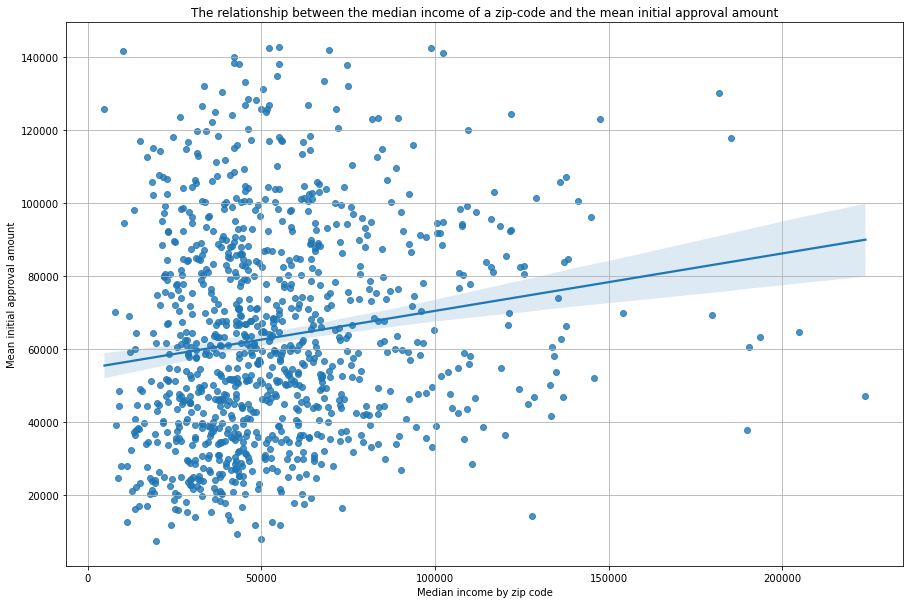

In [117]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[15,10])
sns.regplot(dfSample["Median"],dfSample["InitialApprovalAmount"],dfSample)
plt.xlabel("Median income by zip code")
plt.ylabel("Mean initial approval amount")
plt.title("The relationship between the median income of a zip-code and the mean initial approval amount")
plt.grid()
plt.show()

In [118]:
import seaborn as sns
sns.regplot

<function seaborn.regression.regplot(*, x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)>

In [119]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y)

In [120]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

Look at other forms of regression, check with different variables, 
Check if median income is correlated to loan approval amount
Hu et. al. lookup Stock Market Paper, 2007
You can also do PCA 

In [121]:
model = lin_reg.fit(X_train,y_train)

In [122]:
y_pred = model.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

815374506.8307744

In [124]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,y_pred)

0.5515514602794306

In [125]:
from sklearn.metrics import explained_variance_score

explained_variance_score(y_pred, y_test)

-26.39822772871995

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26467 entries, 0 to 31955
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Median  26467 non-null  int64
dtypes: int64(1)
memory usage: 413.5 KB


In [127]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26467 entries, 0 to 31955
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InitialApprovalAmount  26467 non-null  float64
dtypes: float64(1)
memory usage: 413.5 KB


In [128]:
import statsmodels.api as sm

X_ols = X
y_ols = y

X_ols = sm.add_constant(X_ols)

result = sm.OLS(y_ols,X_ols).fit()

In [129]:
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     InitialApprovalAmount   R-squared:                       0.035
Model:                               OLS   Adj. R-squared:                  0.035
Method:                    Least Squares   F-statistic:                     955.8
Date:                   Thu, 16 Jun 2022   Prob (F-statistic):          3.45e-206
Time:                           10:45:46   Log-Likelihood:            -3.0898e+05
No. Observations:                  26467   AIC:                         6.180e+05
Df Residuals:                      26465   BIC:                         6.180e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.103e+04 

In [130]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
model = regressor.fit(X_train, y_train)

In [131]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.19210543]]
[50938.0515411]


In [132]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.033753360512837616

In [133]:
np.sqrt(r2_score(y_test,y_pred))

0.18372087663855083

In [134]:
X

,Median
0,12641
2,9923
3,34054
5,14558
6,19946
...,...
31950,59519
31951,69886
31953,86630
31954,64332


In [135]:
y["InitialApprovalAmount"]

0        19397.552099
2        19397.552099
3        19397.552099
5        27849.886982
6        27849.886982
             ...     
31950    50773.657458
31951    95393.482837
31953    76587.420484
31954    76587.420484
31955    20123.684932
Name: InitialApprovalAmount, Length: 26467, dtype: float64

In [136]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias=False)
poly

PolynomialFeatures(degree=3, include_bias=False)

In [137]:
X_test

,Median
3948,110826
31678,13036
15926,54415
12104,21391
25399,39207
...,...
12338,19843
23391,58616
2652,110352
4197,56638


In [138]:
X_train_poly = X_train["Median"].values
X_test_poly = X_test["Median"].values


In [139]:
X_train.shape

(19850, 1)

In [140]:
y_train.shape

(19850, 1)

In [141]:
y_poly.shape

NameError: name 'y_poly' is not defined

In [ ]:
X_poly.shape

(26467,)

In [ ]:
poly_features = poly.fit_transform(X_train_poly.reshape(-1, 1))

In [ ]:
poly_features.shape

(26467, 2)

In [ ]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [ ]:
y_pred_poly = poly_reg_model.predict(poly_features)

In [ ]:
r2_score(y_pred_poly, y_train)

-27.975956389477208

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [144]:
for i in range(2,20):
    cv = KFold(n_splits=i)

    #build multiple linear regression model
    model = LinearRegression()

    #use k-fold CV to evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                            cv=cv, n_jobs=-1)

    #view mean absolute error
    print(np.mean(np.abs(scores)))


23225.120371457255
23304.402427377365
23528.610407995053
23488.307002355075
23338.7548422008
23474.677024289405
23416.257401009083
23407.40475385076
23362.964820669502
23379.40048235672
23381.56883940483
23334.22399094693
23350.24679956726
23334.82156722059
23341.398518036185
23334.227626013926
23331.073007204308
23318.878838278702


In [ ]:
scores

array([-26853.61327205, -20475.6188817 , -25493.12076168, -25054.90774718,
       -20972.55362016, -20404.54938579, -19270.02667897, -23184.99900339,
       -24904.60890737, -23038.79561543, -25422.23038605, -24920.65762064,
       -24860.78215063, -24086.91969619, -21853.48196361, -22694.93423964,
       -21322.20315021, -23680.86889064, -24563.82595597])

In [ ]:
df

BorrowerZip   
00602        1    3
00603        1    5
00606        1    1
00610        1    3
00612        1    4
                 ..
99833        1    2
99835        1    1
99840        1    1
99901        1    2
99926        1    1
Length: 13441, dtype: int64

In [ ]:
demographics = pd.read_csv()

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [ ]:
education = pd.read_csv("/Users/shakilrafi/Downloads/ACSST5Y2020/ACSST5Y2020.S1501_data_with_overlays_2022-04-26T221454.csv")

/var/folders/zc/cc95gj757jqdfmtj7lsf19j00000gn/T/ipykernel_51156/38216758.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548

In [ ]:
education.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,...,S1501_C06_060E,S1501_C06_060M,S1501_C06_061E,S1501_C06_061M,S1501_C06_062E,S1501_C06_062M,S1501_C06_063E,S1501_C06_063M,S1501_C06_064E,S1501_C06_064M
0,id,Geographic Area Name,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...
1,8600000US00601,ZCTA5 00601,1561,31,235,101,403,151,719,173,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,8600000US00602,ZCTA5 00602,3399,40,219,121,686,197,1890,248,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,8600000US00603,ZCTA5 00603,4146,254,487,137,1326,224,2002,288,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,8600000US00606,ZCTA5 00606,587,121,74,54,125,64,328,93,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [ ]:
path = "/Users/shakilrafi/Project_Small_Business_Schubert/"
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file, usecols=["BorrowerZip","LMIIndicator"]) for file in csv_files)

# Concatenate all DataFrames
lmi   = pd.concat(df_list, ignore_index=True)

In [ ]:
lmi.head()

,BorrowerZip,LMIIndicator
0,33707-1331,N
1,33309,Y
2,34677,N
3,33016-5814,N
4,33907,N


In [ ]:
lmi["BorrowerZip"] = lmi["BorrowerZip"].str.split('-', 1).str[0]

KeyboardInterrupt: 

In [ ]:
lmi

,BorrowerZip,LMIIndicator
0,33707,N
1,33309,Y
2,34677,N
3,33016,N
4,33907,N
...,...,...
11468676,76453,N
11468677,78748,N
11468678,75044,N
11468679,77034,Y


In [ ]:
lmi.groupby("BorrowerZip")

In [ ]:
# Get CSV files list from a folder
path = "/Users/shakilrafi/Project_Small_Business_Schubert/"
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file, usecols=["BorrowerZip"]) for file in csv_files)

# Concatenate all DataFrames
new_df   = pd.concat(df_list, ignore_index=True)

In [ ]:
new_df["BorrowerZip"] = new_df["BorrowerZip"].str.split('-', 1).str[0]

In [ ]:
new_df = new_df.value_counts().to_frame().reset_index()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37640 entries, 0 to 37639
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BorrowerZip  37640 non-null  object
 1   0            37640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 588.2+ KB


In [ ]:
new_df

,BorrowerZip,0
0,30349,10527
1,60620,9549
2,33178,8903
3,60628,8827
4,60619,8716
...,...,...
37635,92633,1
37636,30726,1
37637,92640,1
37638,30609,1


In [ ]:
df

,BorrowerZip,InitialApprovalAmount
0,33707,3900.00
1,33309,3900.00
2,34677,3900.00
3,33016,3900.00
4,33907,3900.00
...,...,...
11468676,76453,86130.00
11468677,78748,86127.00
11468678,75044,86126.32
11468679,77034,86125.00


In [ ]:
population = pd.read_csv("/Users/shakilrafi/Downloads/archive-2/population_by_zip_2010.csv", dtype={"zipcode":str})

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622831 entries, 0 to 1622830
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   population   1622831 non-null  int64  
 1   minimum_age  1523474 non-null  float64
 2   maximum_age  1457236 non-null  float64
 3   gender       1589712 non-null  object 
 4   zipcode      1622831 non-null  object 
 5   geo_id       1622831 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 74.3+ MB


In [ ]:
population = population.rename(columns = {"zipcode":"BorrowerZip"})

In [ ]:
population = population.groupby("BorrowerZip").sum("population").reset_index()

In [ ]:
population = pd.merge(population, new_df)

In [ ]:
population = population.rename(columns={0:"Number of loans"})

In [ ]:
population["Number of loans per capita"] = population["Number of loans"]/population["population"]

In [ ]:
population

,BorrowerZip,population,minimum_age,maximum_age,Number of loans,Number of loans per capita
0,00602,124560,1910.0,1866.0,767,0.006158
1,00603,164067,1910.0,1866.0,1057,0.006442
2,00606,19845,1910.0,1866.0,36,0.001814
3,00610,87048,1910.0,1866.0,316,0.003630
4,00612,201030,1910.0,1866.0,1287,0.006402
...,...,...,...,...,...,...
32283,99923,261,1910.0,1866.0,1,0.003831
32284,99925,2457,1910.0,1866.0,22,0.008954
32285,99926,4380,1910.0,1866.0,73,0.016667
32286,99927,282,1910.0,1866.0,5,0.017730


In [ ]:
population = pd.merge(population,new_df)

In [ ]:
population

,BorrowerZip,population,minimum_age,maximum_age,Number of loans,Number of loans per capita,0
0,00602,124560,1910.0,1866.0,767,0.006158,767
1,00603,164067,1910.0,1866.0,1057,0.006442,1057
2,00606,19845,1910.0,1866.0,36,0.001814,36
3,00610,87048,1910.0,1866.0,316,0.003630,316
4,00612,201030,1910.0,1866.0,1287,0.006402,1287
...,...,...,...,...,...,...,...
32283,99923,261,1910.0,1866.0,1,0.003831,1
32284,99925,2457,1910.0,1866.0,22,0.008954,22
32285,99926,4380,1910.0,1866.0,73,0.016667,73
32286,99927,282,1910.0,1866.0,5,0.017730,5


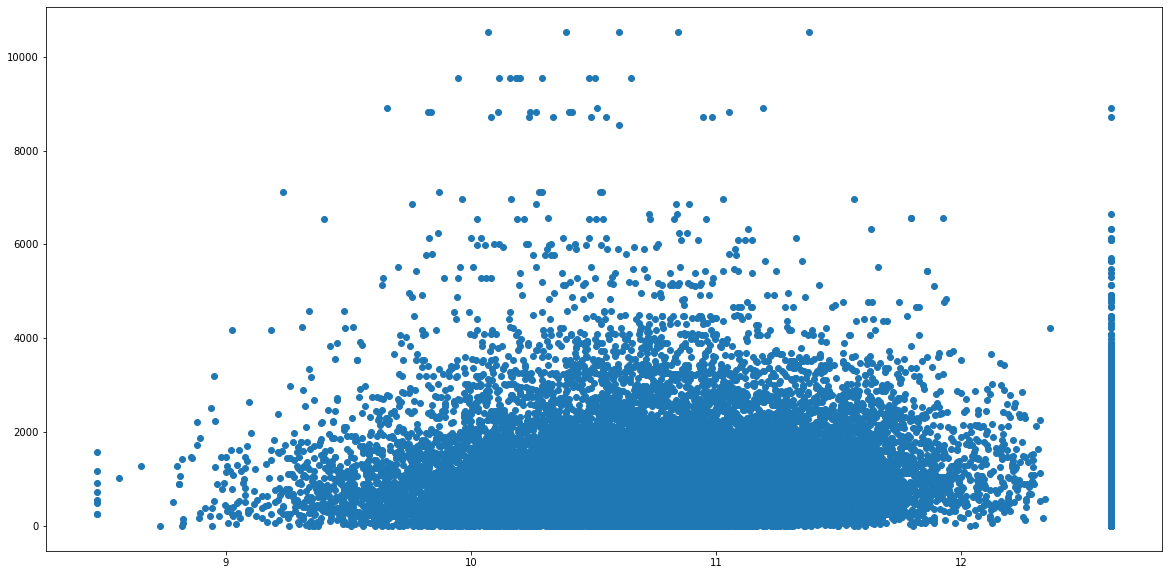

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize = [20,10])
plt.scatter(np.log(population["Median"]),(population["Number of loans"]))

In [ ]:
population["Number of loans"].corr(population["Median"])

0.045054519194083785

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31956 entries, 0 to 31955
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BorrowerZip                 31956 non-null  object 
 1   population                  31956 non-null  int64  
 2   minimum_age                 31956 non-null  float64
 3   maximum_age                 31956 non-null  float64
 4   Number of loans             31956 non-null  int64  
 5   Number of loans per capita  31956 non-null  float64
 6   InitialApprovalAmount       31956 non-null  float64
 7   id                          31956 non-null  int64  
 8   State_Code                  31956 non-null  int64  
 9   State_Name                  31956 non-null  object 
 10  State_ab                    31956 non-null  object 
 11  County                      31956 non-null  object 
 12  City                        31956 non-null  object 
 13  Place                       319

In [ ]:
a = population["Number of loans per capita"].describe()

In [ ]:
population = population.replace([np.inf,-np.inf],np.nan)

In [ ]:
population["Median"].corr(population["Number of loans per capita"])

0.003301786806159421

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31953 entries, 0 to 31955
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BorrowerZip                 31953 non-null  object 
 1   population                  31953 non-null  int64  
 2   minimum_age                 31953 non-null  float64
 3   maximum_age                 31953 non-null  float64
 4   Number of loans             31953 non-null  int64  
 5   Number of loans per capita  31953 non-null  float64
 6   InitialApprovalAmount       31953 non-null  float64
 7   id                          31953 non-null  int64  
 8   State_Code                  31953 non-null  int64  
 9   State_Name                  31953 non-null  object 
 10  State_ab                    31953 non-null  object 
 11  County                      31953 non-null  object 
 12  City                        31953 non-null  object 
 13  Place                       319

In [ ]:
population.head()

,BorrowerZip,population,minimum_age,maximum_age,Number of loans,Number of loans per capita,InitialApprovalAmount,id,State_Code,State_Name,...,Primary,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,00602,124560,1910.0,1866.0,767,0.006158,19397.552099,7201727,72,Puerto Rico,...,place,787,4242241,0,18.357471,-67.155343,17939,12641,15438,721.622289
1,00602,124560,1910.0,1866.0,767,0.006158,19397.552099,720216,72,Puerto Rico,...,Track,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000
2,00602,124560,1910.0,1866.0,767,0.006158,19397.552099,7202966,72,Puerto Rico,...,Track,787,1801613,795887,18.385424,-67.203310,15520,9923,15541,238.813450
3,00602,124560,1910.0,1866.0,767,0.006158,19397.552099,7202976,72,Puerto Rico,...,Track,787,11031227,0,18.356565,-67.180686,41933,34054,31539,313.551070
4,00602,124560,1910.0,1866.0,767,0.006158,19397.552099,7202986,72,Puerto Rico,...,Track,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = population[["Median"]]
y = population[["Number of loans per capita"]]

X_train,X_test,y_train,y_test = train_test_split(X,y)

model2 = LinearRegression()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
r2_score(y_test,y_pred)


-0.0005421058800889611

In [ ]:
model2.predict()

In [ ]:
r2_score(y_pred,y_test)

-7.590818306783973e+17

In [ ]:
y

,Number of loans per capita
0,0.006158
1,0.006158
2,0.006158
3,0.006158
4,0.006158
...,...
31951,0.048554
31952,0.019371
31953,0.019371
31954,0.019371


Text(0, 0.5, 'WCSS')

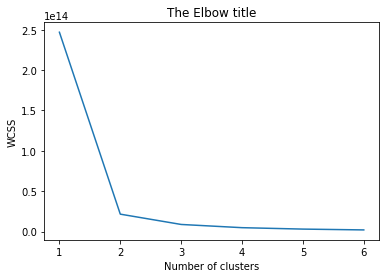

In [ ]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
population = population.dropna()
from sklearn.cluster import KMeans

kmeans = KMeans(2)
X = population[["Number of loans per capita","Median"]]
kmeans.fit(X)


KMeans(n_clusters=2)

In [ ]:
kmeans.cluster_centers_

array([[1.29138104e-02, 5.21807601e+04],
       [1.29958083e-02, 2.96057289e+05]])

In [ ]:
df.columns()

TypeError: 'Index' object is not callable

In [1]:
!pip install quiskit

ERROR: Could not find a version that satisfies the requirement quiskit (from versions: none)
ERROR: No matching distribution found for quiskit


In [1]:
!pip install mapbox

     |████████████████████████████████| 69 kB 4.1 MB/s  eta 0:00:01


In [2]:
!pip install prettymaps




     |████████████████████████████████| 87 kB 3.9 MB/s eta 0:00:011
